#### Objective :

The objectivce of this case study is to demonstrate multivariate regression for each of the continuous attributes of the dataset w.r.t the remaining attributes of the datset. In Machine Learning circles this datset is popular by the namer of 'White-wine quality dataset'. The attributes of the dataset are as follows: *fixed acidity, volatile acidity, citric acid, residual sugar, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol and quality*. Among these attributes, the attribute quality is the only non-continuous/discrete one, since it takes values from among a fixed set.

#### DATA SOURCE : https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

#### Importing the relevant libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Loading the dataset :

In [2]:
wine_data=pd.read_csv('winequality-white.csv',sep=';')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### 1) To predict the fixed acidity based on rest of attributes :

In [3]:
#splitting the datset into input features and target features
X=wine_data.loc[:,'volatile acidity':'quality']
Y=wine_data.loc[:,'fixed acidity']

#splitting the input features and output features fuether into training set and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=48,test_size=500)

#standardizing the test set and training set
from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X_train=standardizer.fit_transform(X_train)
X_test=standardizer.transform(X_test)

#importing various regression models from sklearn
from sklearn.linear_model import LinearRegression as linreg
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score

#fitting the various regression models and displaying their respective performances
for regressor in [linreg(),DTR(),SVR(),RFR()]:
    regressor.fit(X_train,Y_train)
    Y_pred=regressor.predict(X_test)
    print('R-squared for',regressor.__class__.__name__,':',r2_score(Y_test,Y_pred))

R-squared for LinearRegression : 0.6969074526728334
R-squared for DecisionTreeRegressor : 0.49565881254635713
R-squared for SVR : 0.7511769118105682
R-squared for RandomForestRegressor : 0.6668473321245144


In [4]:
#since the score is the highest on SVR therefore we will use it
from sklearn.svm import SVR
regressor=SVR()
regressor.fit(X_train,Y_train)
Y_pred=regressor.predict(X_test)
fixed_acidity=pd.DataFrame(data={'Actual':Y_test,'Predicted':Y_pred})
fixed_acidity.head()

,Actual,Predicted
3814,7.4,7.141671
3855,5.9,6.372791
4023,7.6,7.279937
514,7.8,7.141359
2776,7.0,6.861456


Text(0.5,1,'fixed_acidity')

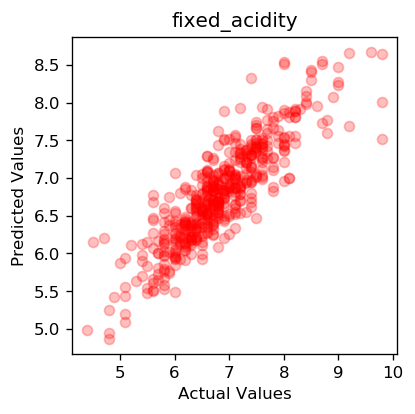

In [37]:
#scatter plot representing the correlation between the actual target values and the corresponding predicted values:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(3.5,3.5),dpi=120)
ax.scatter(fixed_acidity['Actual'],fixed_acidity['Predicted'],alpha=0.25,color='red')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('fixed_acidity')

#### Note : In the subsequent sections, we will use exactly the same workflow to fit the regressor, choose the regressor that performs the best , predict the values  and plot the resultant scatter plots.

#### 2) To predict the volatile acidity based on the rest of attributes :

In [6]:
X=wine_data.loc[:,'citric acid':'quality']
X['fixed acidity']=wine_data['fixed acidity']
Y=wine_data.loc[:,'volatile acidity']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=48,test_size=500)

from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X_train=standardizer.fit_transform(X_train)
X_test=standardizer.transform(X_test)

from sklearn.linear_model import LinearRegression as linreg
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score

for regressor in [linreg(),DTR(),SVR(),RFR()]:
    regressor.fit(X_train,Y_train)
    Y_pred=regressor.predict(X_test)
    print('R-squared for',regressor.__class__.__name__,':',r2_score(Y_test,Y_pred))

R-squared for LinearRegression : 0.19649781111571918
R-squared for DecisionTreeRegressor : 0.1544498642455635
R-squared for SVR : 0.3614884229659576
R-squared for RandomForestRegressor : 0.5458889108414328


In [7]:
regressor=RFR()
regressor.fit(X_train,Y_train)
Y_pred=regressor.predict(X_test)
volatile_acidity=pd.DataFrame(data={'Actual':Y_test,'Predicted':Y_pred})
volatile_acidity.head()

,Actual,Predicted
3814,0.34,0.343
3855,0.18,0.266
4023,0.19,0.205
514,0.28,0.234
2776,0.36,0.342


Text(0.5,1,'volatile_acidity')

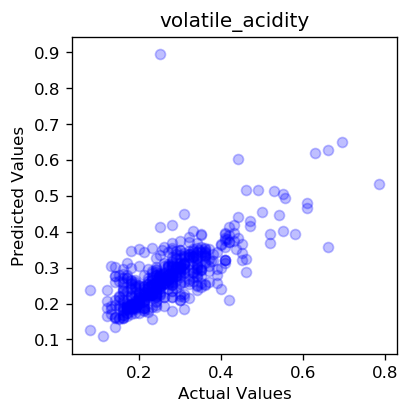

In [38]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(3.5,3.5),dpi=120)
ax.scatter(volatile_acidity['Actual'],volatile_acidity['Predicted'],alpha=0.25,color='blue')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('volatile_acidity')

#### 3) To predict the concentration of citric acid based on rest of the attributes :

In [9]:
X1=wine_data.loc[:,'fixed acidity':'volatile acidity']
X2=wine_data.loc[:,'residual sugar':'quality']
X=pd.concat([X1,X2],axis=1)
Y=wine_data.loc[:,'citric acid']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=500)

from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X_train=standardizer.fit_transform(X_train)
X_test=standardizer.transform(X_test)

from sklearn.linear_model import LinearRegression as linreg
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score

for regressor in [linreg(),DTR(),SVR(),RFR()]:
    regressor.fit(X_train,Y_train)
    Y_pred=regressor.predict(X_test)
    print('R-squared for',regressor.__class__.__name__,':',r2_score(Y_test,Y_pred))

R-squared for LinearRegression : 0.20394853352116193
R-squared for DecisionTreeRegressor : 0.20450016743147303
R-squared for SVR : 0.4233433667713711
R-squared for RandomForestRegressor : 0.5752271790261241


In [10]:
regressor=RFR()
regressor.fit(X_train,Y_train)
Y_pred=regressor.predict(X_test)
citric_acid=pd.DataFrame(data={'Actual':Y_test,'Predicted':Y_pred})
citric_acid.head()

,Actual,Predicted
2762,0.35,0.354
42,0.26,0.255
1419,0.74,0.438
3664,0.54,0.343
2125,0.22,0.331


Text(0.5,1,'citric_acidity')

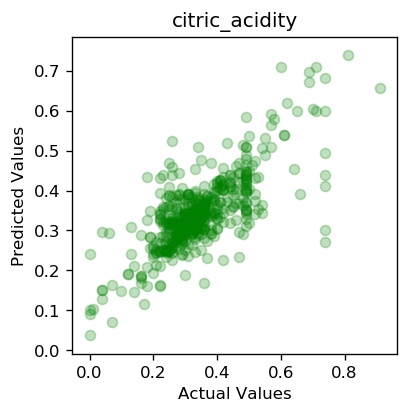

In [39]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(3.5,3.5),dpi=120)
ax.scatter(citric_acid['Actual'],citric_acid['Predicted'],alpha=0.25,color='green')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('citric_acidity')

#### 4) To predict the concentration of residual sugar based on  rest of the attributes :

In [12]:
X1=wine_data.loc[:,'fixed acidity':'citric acid']
x2=wine_data.loc[:,'chlorides':'quality']
X=pd.concat([X1,X2],axis=1)
Y=wine_data.loc[:,'residual sugar']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=500)

from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X_train=standardizer.fit_transform(X_train)
X_test=standardizer.transform(X_test)

from sklearn.linear_model import LinearRegression as linreg
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score

for regressor in [linreg(),DTR(),SVR(),RFR()]:
    regressor.fit(X_train,Y_train)
    Y_pred=regressor.predict(X_test)
    print('R-squared for',regressor.__class__.__name__,':',r2_score(Y_test,Y_pred))

R-squared for LinearRegression : 1.0
R-squared for DecisionTreeRegressor : 0.9272141069846364
R-squared for SVR : 0.7684033715494993
R-squared for RandomForestRegressor : 0.9201572302977677


In [13]:
linreg=linreg()
linreg.fit(X_train,Y_train)
Y_pred=linreg.predict(X_test)
residual_sugar=pd.DataFrame(data={'Actual':Y_test,'Predicted':Y_pred})
residual_sugar.head()

,Actual,Predicted
2762,1.40,1.40
42,7.40,7.40
1419,1.60,1.60
3664,5.70,5.70
2125,12.15,12.15


Text(0.5,1,'residual_sugar')

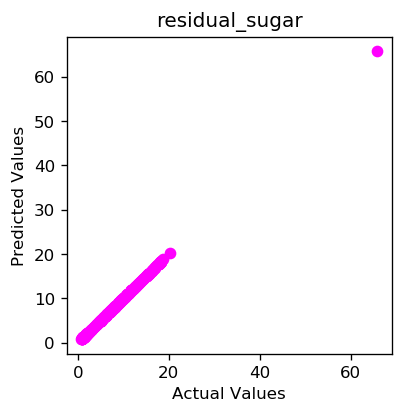

In [40]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(3.5,3.5),dpi=120)
ax.scatter(residual_sugar['Actual'],residual_sugar['Predicted'],alpha=1,color='magenta')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('residual_sugar')

#### 5) To predict the concentration of chlorides based on rest of the attributes :

In [15]:
X1=wine_data.loc[:,'fixed acidity':'residual sugar']
X2=wine_data.loc[:,'free sulfur dioxide':'quality']
X=pd.concat([X1,X2],axis=1)
Y=wine_data.loc[:,'chlorides']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=500)

from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X_train=standardizer.fit_transform(X_train)
X_test=standardizer.transform(X_test)

from sklearn.linear_model import LinearRegression as linreg
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score

for regressor in [linreg(),DTR(),SVR(),RFR()]:
    regressor.fit(X_train,Y_train)
    Y_pred=regressor.predict(X_test)
    print('R-squared for',regressor.__class__.__name__,':',r2_score(Y_test,Y_pred))

R-squared for LinearRegression : 0.14134059663183918
R-squared for DecisionTreeRegressor : -0.016429550991702513
R-squared for SVR : -9.648508741744443
R-squared for RandomForestRegressor : 0.4293390890735099


In [16]:
RFR=RFR()
RFR.fit(X_train,Y_train)
Y_pred=RFR.predict(X_test)
linreg=linreg()
linreg.fit(X_train,Y_train)
Y_pred=linreg.predict(X_test)
chlorides=pd.DataFrame(data={'Actual':Y_test,'Predicted':Y_pred})
chlorides.head()

,Actual,Predicted
2762,0.050,0.045896
42,0.069,0.051651
1419,0.040,0.047399
3664,0.035,0.037963
2125,0.048,0.043779


Text(0.5,1,'chlorides')

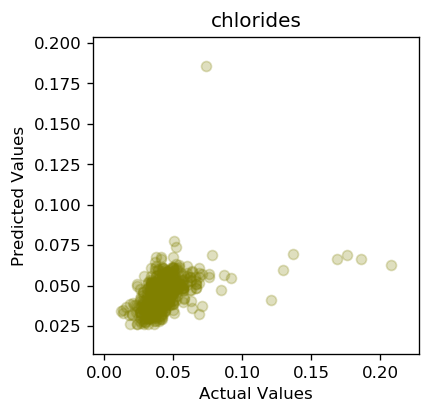

In [41]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(3.5,3.5),dpi=120)
ax.scatter(chlorides['Actual'],chlorides['Predicted'],alpha=0.25,color='olive')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('chlorides')

#### 6) To predict the concentration of free sulfur dioxide based on rest of the attributes :

In [18]:
X1=wine_data.loc[:,'fixed acidity':'chlorides']
X2=wine_data.loc[:,'total sulfur dioxide':'quality']
X=pd.concat([X1,X2],axis=1)
Y=wine_data.loc[:,'free sulfur dioxide']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=500)

from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X_train=standardizer.fit_transform(X_train)
X_test=standardizer.transform(X_test)

from sklearn.linear_model import LinearRegression as linreg
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score

for regressor in [linreg(),DTR(),SVR(),RFR()]:
    regressor.fit(X_train,Y_train)
    Y_pred=regressor.predict(X_test)
    print('R-squared for',regressor.__class__.__name__,':',r2_score(Y_test,Y_pred))

R-squared for LinearRegression : 0.38375107058541236
R-squared for DecisionTreeRegressor : 0.31746453558677434
R-squared for SVR : 0.4159638760524276
R-squared for RandomForestRegressor : 0.6520047892471803


In [19]:
RFR=RFR()
RFR.fit(X_train,Y_train)
Y_pred=RFR.predict(X_test)
free_sulfur_dioxide=pd.DataFrame(data={'Actual':Y_test,'Predict':Y_pred})
free_sulfur_dioxide.head()

,Actual,Predict
2762,8.0,28.65
42,28.0,32.70
1419,27.0,25.80
3664,54.0,46.00
2125,42.0,43.10


Text(0.5,1,'free_sulfur_dioxide')

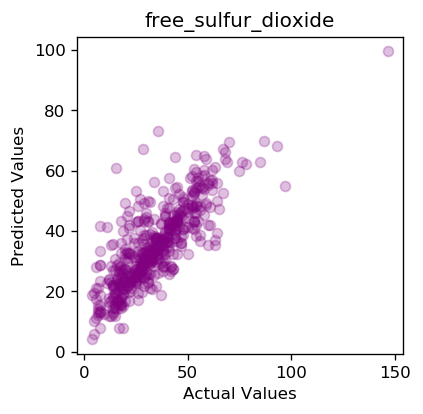

In [42]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(3.5,3.5),dpi=120)
ax.scatter(free_sulfur_dioxide['Actual'],free_sulfur_dioxide['Predict'],alpha=0.25,color='purple')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('free_sulfur_dioxide')

#### 7) To predict the concentration of total sulfur dioxide based on rest of the attributes :

In [21]:
X1=wine_data.loc[:,'fixed acidity':'free sulfur dioxide']
X2=wine_data.loc[:,'density':'quality']
X=pd.concat([X1,X2],axis=1)
Y=wine_data.loc[:,'total sulfur dioxide']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=500)

from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X_train=standardizer.fit_transform(X_train)
X_test=standardizer.transform(X_test)

from sklearn.linear_model import LinearRegression as linreg
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score

for regressor in [linreg(),DTR(),SVR(),RFR()]:
    regressor.fit(X_train,Y_train)
    Y_pred=regressor.predict(X_test)
    print('R-squared for',regressor.__class__.__name__,':',r2_score(Y_test,Y_pred))

R-squared for LinearRegression : 0.3293644489185943
R-squared for DecisionTreeRegressor : 0.47359579775371163
R-squared for SVR : 0.4781044837828917
R-squared for RandomForestRegressor : 0.6866365099289379


In [22]:
RFR=RFR()
RFR.fit(X_train,Y_train)
Y_pred=RFR.predict(X_test)
total_sulfur_dioxide=pd.DataFrame(data={'Actual':Y_test,'Predicted':Y_pred})
total_sulfur_dioxide.head()

,Actual,Predicted
2762,163.0,97.5
42,160.0,155.2
1419,103.0,118.3
3664,155.0,136.2
2125,163.0,144.1


Text(0.5,1,'total_sulfur_dioxide')

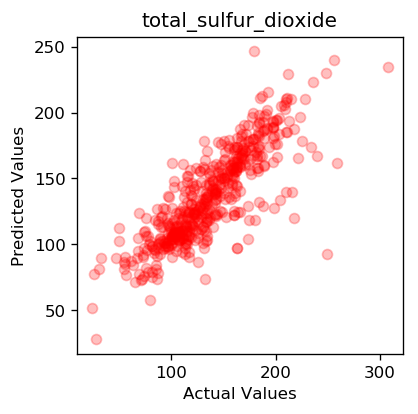

In [43]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(3.5,3.5),dpi=120)
ax.scatter(total_sulfur_dioxide['Actual'],total_sulfur_dioxide['Predicted'],alpha=0.25,color='red')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('total_sulfur_dioxide')

#### 8) To predict the density based on rest of the attributes : :

In [24]:
X1=wine_data.loc[:,'fixed acidity':'total sulfur dioxide']
X2=wine_data.loc[:,'pH':'quality']
X=pd.concat([X1,X2],axis=1)
Y=wine_data.loc[:,'density']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=500)

from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X_train=standardizer.fit_transform(X_train)
X_test=standardizer.transform(X_test)

from sklearn.linear_model import LinearRegression as linreg
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score

for regressor in [linreg(),DTR(),SVR(),RFR()]:
    regressor.fit(X_train,Y_train)
    Y_pred=regressor.predict(X_test)
    print('R-squared for',regressor.__class__.__name__,':',r2_score(Y_test,Y_pred))

R-squared for LinearRegression : 0.8991752516858406
R-squared for DecisionTreeRegressor : 0.7513282300702633
R-squared for SVR : -1.7772338681493305
R-squared for RandomForestRegressor : 0.7489293356285363


In [25]:
linreg=linreg()
linreg.fit(X_train,Y_train)
Y_pred=linreg.predict(X_test)
density=pd.DataFrame(data={'Actual':Y_test,'Predicted':Y_pred})
density.head()

,Actual,Predicted
2762,0.99244,0.992790
42,0.99540,0.995264
1419,0.99160,0.991884
3664,0.98976,0.989566
2125,0.99570,0.996026


Text(0.5,1,'density')

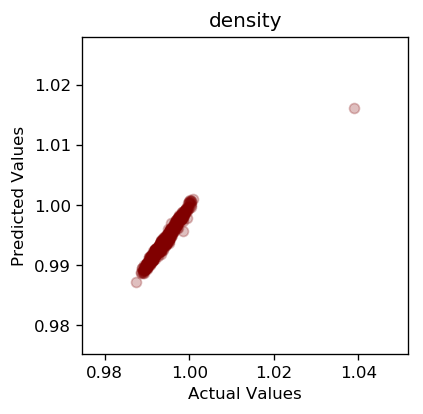

In [44]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(3.5,3.5),dpi=120)
ax.scatter(density['Actual'],density['Predicted'],alpha=0.25,color='maroon')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('density')

#### 9) To predicting the pH based on rest of the attributes :

In [27]:
X1=wine_data.loc[:,'fixed acidity':'density']
X2=wine_data.loc[:,'sulphates':'quality']
X=pd.concat([X1,X2],axis=1)
Y=wine_data.loc[:,'pH']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=500)

from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X_train=standardizer.fit_transform(X_train)
X_test=standardizer.transform(X_test)

from sklearn.linear_model import LinearRegression as linreg
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score

for regressor in [linreg(),DTR(),SVR(),RFR()]:
    regressor.fit(X_train,Y_train)
    Y_pred=regressor.predict(X_test)
    print('R-squared for',regressor.__class__.__name__,':',r2_score(Y_test,Y_pred))

R-squared for LinearRegression : -0.051960938987528626
R-squared for DecisionTreeRegressor : 0.3843330862691049
R-squared for SVR : 0.6796001823519794
R-squared for RandomForestRegressor : 0.6198462118500412


In [28]:
SVR=SVR()
SVR.fit(X_train,Y_train)
Y_pred=SVR.predict(X_test)
pH=pd.DataFrame(data={'Actual':Y_test,'Predicted':Y_pred})
pH.head()

,Actual,Predicted
2762,3.24,3.211167
42,3.13,3.130390
1419,3.07,3.180803
3664,3.27,3.262235
2125,3.20,3.172570


Text(0.5,1,'pH')

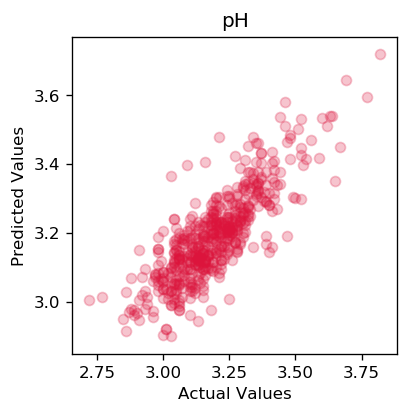

In [45]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(3.5,3.5),dpi=120)
ax.scatter(pH['Actual'],pH['Predicted'],alpha=0.25,color='crimson')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('pH')

#### 10) To predict the concentration of sulphates based on rest of the attributes :

In [30]:
X1=wine_data.loc[:,'fixed acidity':'pH']
X2=wine_data.loc[:,'alcohol':'quality']
X=pd.concat([X1,X2],axis=1)
Y=wine_data.loc[:,'sulphates']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=500)

from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X_train=standardizer.fit_transform(X_train)
X_test=standardizer.transform(X_test)

from sklearn.linear_model import LinearRegression as linreg
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score

for regressor in [linreg(),DTR(),SVR(),RFR()]:
    regressor.fit(X_train,Y_train)
    Y_pred=regressor.predict(X_test)
    print('R-squared for',regressor.__class__.__name__,':',r2_score(Y_test,Y_pred))

R-squared for LinearRegression : -0.15709965240465973
R-squared for DecisionTreeRegressor : -0.07060040502025089
R-squared for SVR : 0.29520209106250483
R-squared for RandomForestRegressor : 0.4186087429371468


In [31]:
RFR=RFR()
RFR.fit(X_train,Y_train)
Y_pred=RFR.predict(X_test)
sulphates=pd.DataFrame(data={'Actual':Y_test,'Predicted':Y_pred})
sulphates.head()

,Actual,Predicted
2762,0.42,0.524
42,0.46,0.458
1419,0.40,0.593
3664,0.34,0.527
2125,0.46,0.487


Text(0.5,1,'sulphates')

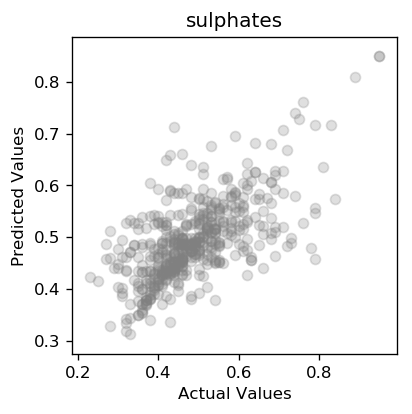

In [46]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(3.5,3.5),dpi=120)
ax.scatter(sulphates['Actual'],sulphates['Predicted'],alpha=0.25,color='grey')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('sulphates')

#### 11) To predict the concentration of alcohol based on rest of the attributes :

In [33]:
X1=wine_data.loc[:,'fixed acidity':'sulphates']
X2=wine_data.loc[:,'quality']
X=pd.concat([X1,X2],axis=1)

Y=wine_data.loc[:,'alcohol']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=500)

from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X_train=standardizer.fit_transform(X_train)
X_test=standardizer.transform(X_test)

from sklearn.linear_model import LinearRegression as linreg
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score

for regressor in [linreg(),DTR(),SVR(),RFR()]:
    regressor.fit(X_train,Y_train)
    Y_pred=regressor.predict(X_test)
    print('R-squared for',regressor.__class__.__name__,':',r2_score(Y_test,Y_pred))

R-squared for LinearRegression : 0.5223765536525399
R-squared for DecisionTreeRegressor : 0.8469071627356162
R-squared for SVR : 0.9190637335675098
R-squared for RandomForestRegressor : 0.9207858920810479


In [34]:
SVR=SVR()
SVR.fit(X_train,Y_train)
Y_pred=SVR.predict(X_test)
alcohol=pd.DataFrame(data={'Actual':Y_test,'Predicted':Y_pred})
alcohol.head()

,Actual,Predicted
2762,10.7,10.726877
42,9.8,9.776172
1419,10.8,11.184564
3664,12.9,12.407346
2125,10.1,10.080246


Text(0.5,1,'alcohol')

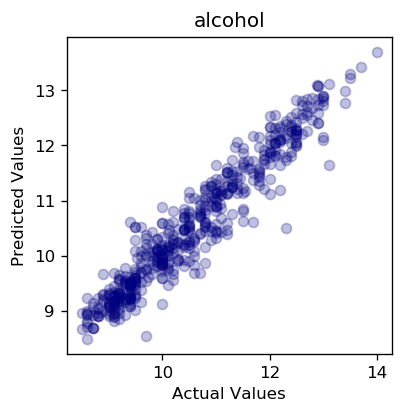

In [47]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(3.5,3.5),dpi=120)
ax.scatter(alcohol['Actual'],alcohol['Predicted'],alpha=0.25,color='navy')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('alcohol')